# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $7 \% 7 $.

In [ ]:
N = 0
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
df = pd.read_csv("../../datasets/teen_phone_addiction_dataset.csv")

# Выбираем нужный столбец (N % 7 = 0 => Daily_Usage_Hours)
col = "Daily_Usage_Hours"
data = df["Daily_Usage_Hours"]


## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

In [6]:
mean = data.mean()
var = data.var()
mode = data.mode().iloc[0]
median = data.median()
quantiles = data.quantile([0.25, 0.5, 0.75])
excess = stats.kurtosis(data)
skewness = stats.skew(data)
iqr = stats.iqr(data)


print("Среднее:", mean)
print("Дисперсия:", var)
print("Мода:", mode)
print("Медиана:", median)
print("Квантили:\n", quantiles)
print("Эксцесс:", excess)
print("Асимметрия:", skewness)
print("IQR:", iqr)

Среднее: 5.020666666666667
Дисперсия: 3.827895520729132
Мода: 4.4
Медиана: 5.0
Квантили:
 0.25    3.7
0.50    5.0
0.75    6.4
Name: Daily_Usage_Hours, dtype: float64
Эксцесс: -0.1226141759584718
Асимметрия: 0.016197292999157842
IQR: 2.7


Промежуточные выводы I (исходные данные)
- Среднее: 5.02 ч/день
- Медиана: 5.0 => распределение почти симметрично
- Мода: 4.4 => самый частый результат немного ниже среднего
- Дисперсия: 3.83 => умеренный разброс данных
- IQR: 2.7 => межквартильный размах показывает разброс средних 50% значений 
- квантили: 0.25=3.7, 0.5=5.0, 0.75=6.4  
- Асимметрия: 0.016 => почти нулевая, распределение близко к симметричному
- Эксцесс: -0.123 (отрицательный) => пик распределения ниже и тупее, чем у нормального, хвосты распределения легче, что говорит о меньшей вероятности экстремальных значений. 

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

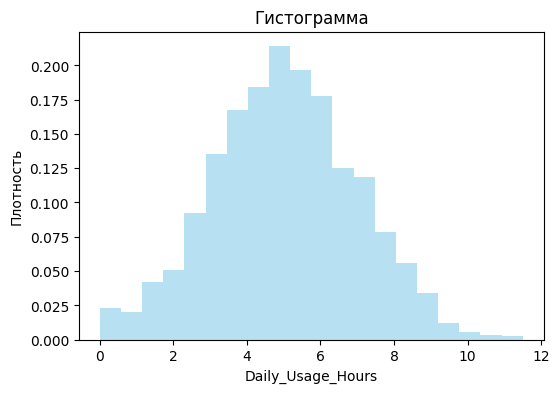

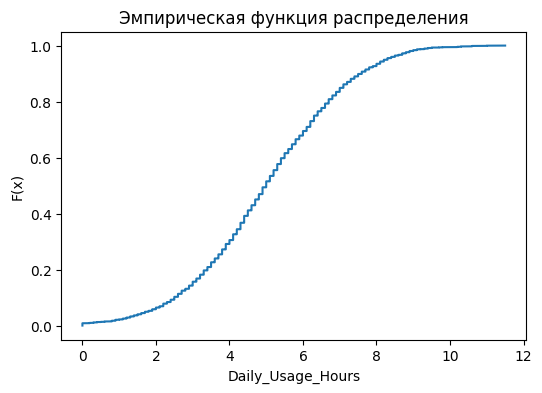

In [16]:
plt.figure(figsize=(6,4))
plt.hist(data, bins=20, density=True, alpha=0.6, color="skyblue")
plt.title("Гистограмма")
plt.xlabel(col)
plt.ylabel("Плотность")
plt.show()


# Эмпирическая функция распределения
plt.figure(figsize=(6,4))
plt.step(sorted(data), np.arange(1, len(data)+1)/len(data))
plt.title("Эмпирическая функция распределения")
plt.xlabel(col)
plt.ylabel("F(x)")
plt.show()

Промежуточные выводы I (графики)
Гистограмма и эмпирическая функция распределения показывают умеренный разброс и почти симметричное распределение.

- Распределение похоже на нормальное (среднее ≈ медиана ≈ 5, асимметрия ≈ 0).
- Разброс умеренный: большинство значений лежат в диапазоне 3–7 часов.

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

χ² статистика: 124.367472800615
Асимметрия: 0.016197292999157842
Эксцесс: -0.1226141759584718


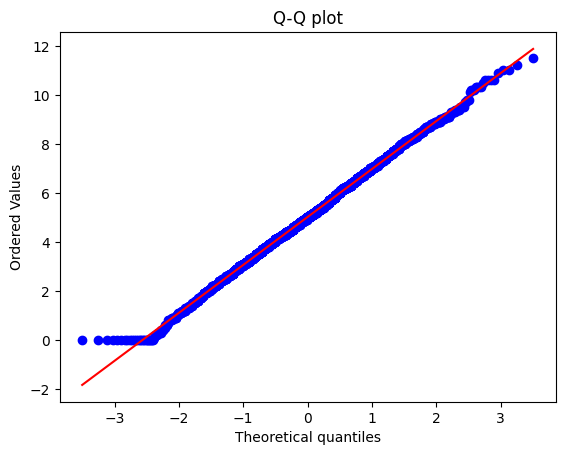

In [13]:
# 1. Хи-квадрат 
observed, bins = np.histogram(data, bins="auto")
expected = len(data) * np.diff(stats.norm.cdf(bins, loc=mean, scale=np.std(data)))
chi2 = ((observed - expected)**2 / expected).sum()
print("χ² статистика:", chi2)

# 2. Асимметрия и эксцесс
print("Асимметрия:", skewness)
print("Эксцесс:", excess)

# Q-Q plot 
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q plot")
plt.show()

на Q–Q plot
- ось X (OX) — теоретические квантили выбранного распределения.
- ось Y (OY) — упорядоченные (отсортированные) значения выборки.

Промежуточные выводы II (проверка нормальности)
- **χ² статистика:** 124.37 => отклонение от идеальной нормальности 
- **Асимметрия:** 0.016 => почти симметрично  
- **Эксцесс:** -0.123 => слегка плоское  
- Q-Q plot подтверждает: точки в центре почти на линии, небольшие отклонения на концах.  
- В целом данные близки к нормальным, но χ² указывает на небольшие отклонения (как видим по графику, в хвостах).

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

Среднее (обработанные): 3.445775808870051e-17
Дисперсия (обработанные): 0.9999999999999999
Асимметрия (обработанные): -1.4130505946823606
Эксцесс (обработанные): 3.3671227176388614


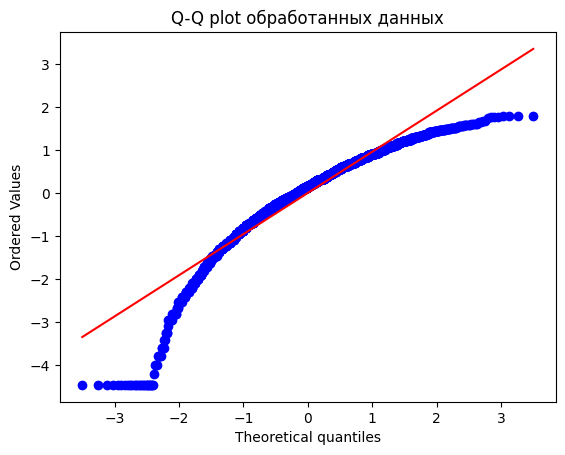

In [14]:
# 1. Удаление выбросов по IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
filtered = data[(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)]

# 2. Логарифмирование и стандартизация
processed = np.log1p(filtered)
processed = (processed - processed.mean()) / processed.std()

# Числовые характеристики обработанных данных
mean_p = processed.mean()
var_p = processed.var()
skew_p = stats.skew(processed)
kurt_p = stats.kurtosis(processed)

print("Среднее (обработанные):", mean_p)
print("Дисперсия (обработанные):", var_p)
print("Асимметрия (обработанные):", skew_p)
print("Эксцесс (обработанные):", kurt_p)

# Q-Q plot
stats.probplot(processed, dist="norm", plot=plt)
plt.title("Q-Q plot обработанных данных")
plt.show()


### Промежуточные выводы III (обработка данных)
- Удалены выбросы по IQR, применено логарифмирование и стандартизация  

- Среднее (mean): близко к 0 → хорошо, стандартизация сработала.
- Дисперсия (var): близко к 1 → стандартное отклонение нормировано.
- Асимметрия (skew): -1.41 → данные смещены влево (хвост слева длиннее).
- Эксцесс (kurt): 3.37 → распределение остроконечное по сравнению с нормальным (для нормального распределения эксцесс ≈ 0 по функции stats.kurtosis, но иногда используется смещение, тогда нормальная куратикса = 3).
Вывод: после удаления выбросов, логарифмирования и стандартизации данные стали ближе к нормальному распределению, но всё ещё остаётся заметная асимметрия и "тяжёлый хвост".

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

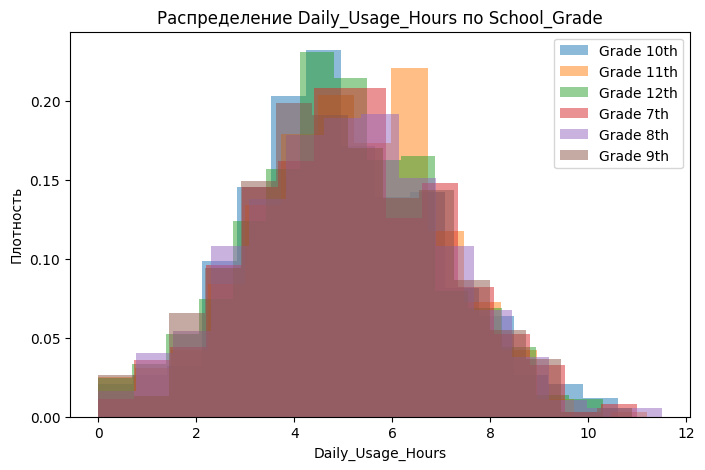

                  mean       var
School_Grade                    
10th          4.977618  3.812605
11th          5.061795  3.635211
12th          4.936862  3.735589
7th           5.077062  3.883344
8th           5.066390  4.009513
9th           5.012167  3.912652


In [15]:
# === IV. Группировка по School_Grade ===
groups = df.groupby("School_Grade")[col]

# 1. Гистограммы на одном графике
plt.figure(figsize=(8,5))
for grade, values in groups:
    plt.hist(values.dropna(), bins=15, alpha=0.5, label=f"Grade {grade}", density=True)
plt.title(f"Распределение {col} по School_Grade")
plt.xlabel(col)
plt.ylabel("Плотность")
plt.legend()
plt.show()

# 2. Среднее и дисперсия по группам
stats_by_group = groups.agg(["mean", "var"])
print(stats_by_group)

Выводы по данным:
- Средние значения похожи, около 5.0 — нет сильной разницы между классами.
- Дисперсия тоже близка друг к другу (≈3.6–4.0), значит разброс оценок примерно одинаков.

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'